# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Theosamuele Signor
    
ID: 1230667

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1230667
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [53 50 41 38 44 58 59 60 47 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


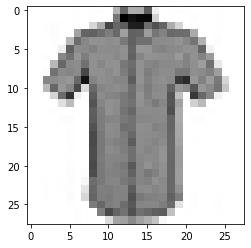

LABEL: 6
INPUT:


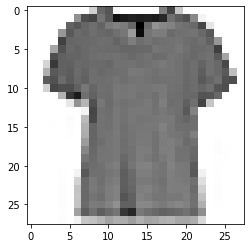

LABEL: 0
INPUT:


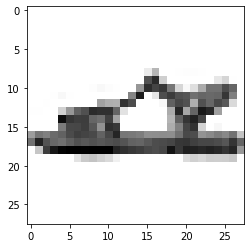

LABEL: 5
INPUT:


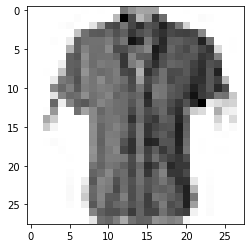

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

#run linear SVM

lk_svm = SVC(kernel='linear')
lk_svm_CV = GridSearchCV(lk_svm, parameters,cv=4)
lk_svm_CV.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found: "+str(lk_svm_CV.best_params_))

print("Score with best parameters: "+str(lk_svm_CV.best_score_))

print("All scores on the grid: "+str(lk_svm_CV.cv_results_['mean_test_score']))


RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.05}
Score with best parameters: 0.776
All scores on the grid: [0.354 0.728 0.776 0.774 0.774 0.774 0.774]


/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
p2_svm = SVC(kernel='poly',degree=2)
p2_svm_CV = GridSearchCV(p2_svm, parameters,cv=5)
p2_svm_CV.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found: "+str(p2_svm_CV.best_params_))

print("Score with best parameters: "+str(p2_svm_CV.best_score_))

print("All scores on the grid: "+str(p2_svm_CV.cv_results_['mean_test_score']))


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.768
All scores on the grid: [0.73  0.768 0.766 0.764 0.766 0.766 0.768 0.766 0.766]


/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 3

p_svm = SVC(kernel='poly',degree=degree)
p_svm_CV = GridSearchCV(p_svm, parameters,cv=5)
p_svm_CV.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found: "+str(p_svm_CV.best_params_))

print("Score with best parameters: "+str(p_svm_CV.best_score_))

print("All scores on the grid: "+str(p_svm_CV.cv_results_['mean_test_score']))


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.736
All scores on the grid: [0.732 0.736 0.736 0.732 0.736 0.736 0.732 0.736 0.736]


/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm_CV = GridSearchCV(rbf_svm, parameters,cv=5)
rbf_svm_CV.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found: "+str(rbf_svm_CV.best_params_))

print("Score with best parameters: "+str(rbf_svm_CV.best_score_))

print("All scores on the grid: "+str(rbf_svm_CV.cv_results_['mean_test_score']))


/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.005}
Score with best parameters: 0.79
All scores on the grid: [0.734 0.674 0.122 0.142 0.79  0.772 0.138 0.12  0.768 0.772 0.138 0.12
 0.768 0.772 0.138 0.12 ]


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

### ANSWER 
I osberve than the best regularization is smaller for the RBF kernel and even gamma; the score for RBF is much more sensitive to the change of parameter configuration; the score with best parameters is higher for RBF .

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf',C=5,gamma=0.005)
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.032000
Best SVM test error: 0.215412


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [242 266 222 243 246 249 275 267 265 225]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [14]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf',C=5,gamma=0.005)
best_SVM.fit(X_train, y_train)
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

#no regularization
best_SVM = SVC(kernel='rbf',C=100000,gamma=0.005)
best_SVM.fit(X_train, y_train)
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("SVM training error no regularization: %f" % training_error)
print ("SVM test error no regularization: %f" % test_error)

Best SVM training error: 0.064800
Best SVM test error: 0.158191
SVM training error no regularization: 0.000000
SVM test error no regularization: 0.159217


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [15]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression(penalty='l2',solver='liblinear',C=100000)
log_reg.fit(X_train, y_train)
training_error = 1. - log_reg.score(X_train,y_train)
test_error = 1. - log_reg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.228452


### TO DO 9 Then use also some regularization 

In [16]:
log_reg_L2 = linear_model.LogisticRegression(penalty='l2',solver='liblinear')
log_reg_L2.fit(X_train, y_train)
training_error = 1. - log_reg_L2.score(X_train,y_train)
test_error = 1. - log_reg_L2.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best regularized logistic regression training error: 0.040800
Best regularized logistic regression test error: 0.178243


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization

### ANSWER
- With m=2500, since there is more training data in the training set, and thus there are more sample to learn from, both the training and test errors are smaller than with n=500
- Without regularization, the algorithm overfits the data in the training set; in fact the training error in both SVM and logistic regression is zero (smaller than regularized ones), while the test error is larger than the regularized training procedures.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


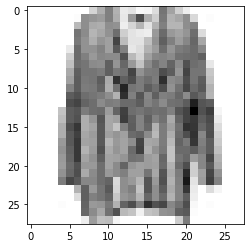

LABEL: 2
predicted LR label: 3 (Dress)
INPUT:


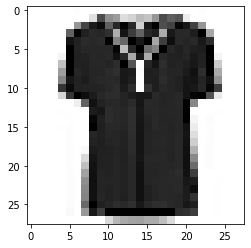

LABEL: 6
predicted LR label: 0 (T-shirt/top)
INPUT:


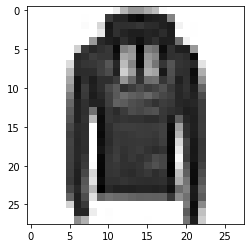

LABEL: 2
predicted LR label: 4 (Coat)
INPUT:


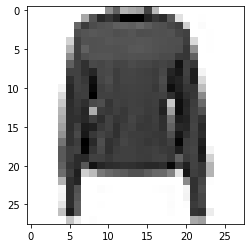

LABEL: 2
predicted LR label: 4 (Coat)
INPUT:


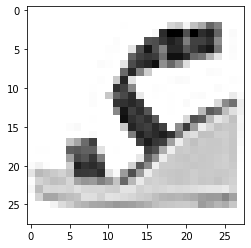

LABEL: 5
predicted LR label: 3 (Dress)


In [17]:
LR_prediction = log_reg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

Xsamples=[]
Ysamples=[]
predLR=[]
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
for i in np.arange(len(X_test)):
    if y_test[i] != LR_prediction[i] and y_test[i]==SVM_prediction[i]:
        Xsamples.append(X_test[i])
        Ysamples.append(y_test[i])
        predLR.append(LR_prediction[i])
        
#plot just first five LR misses
for i in range(5):
    plot_input(Xsamples,Ysamples,i)
    print('predicted LR label: '+str(predLR[i])+' ('+str(labels[predLR[i]])+')')

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [18]:
# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5758 5734 5778 5757 5754 5751 5725 5733 5735 5775]

 Confusion matrix SVM  
 
 [[4589    6  111  267   25    3  707    1   48    1]
 [  22 5535   23  117    8    0   27    0    2    0]
 [ 101    5 4235   68  686    3  643    0   37    0]
 [ 245   73   64 5022  157    0  178    0   18    0]
 [  30    3  713  231 4135    0  620    0   21    1]
 [   3    0    0    7    1 5267    6  302   35  130]
 [ 864   16  672  159  443    1 3494    0   74    2]
 [   0    0    0    0    0  261    0 5194    4  274]
 [  30    3   43   21   30   30  106   41 5418   13]
 [   0    1    0    6    0  101    1  206    4 5456]]

 Confusion matrix SVM (normalized)   
 
 [[0.8  0.   0.02 0.05 0.   0.   0.12 0.   0.01 0.  ]
 [0.   0.97 0.   0.02 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.73 0.01 0.12 0.   0.11 0.   0.01 0.  ]
 [0.04 0.01 0.01 0.87 0.03 0.   0.03 0.   0.   0.  ]
 [0.01 0.   0.12 0.04 0.72 0.   0.11 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.92 0.   0.05 0.0

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

(The best accuracies are provided by SVM,so I'm refering to the SVM confusion matrix in particular).<br>
Some classes have lower accuracies than others maybe because they present "less" peculiar features to extract, and in the dataset they might be more different whithin the same class than others are, or some samples are similar to another class. The lower accuracy (0.61 in this run) is for the shirt, as it can be confused for a tshirt (864 times in this run), for example.
